# **AP155 Lab Assignment** 
## Module 3: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 15, 15, 15, 25, and 30 points, respectively).

_Due Date_: **5PM of November 9 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Hans Emmanuel Hernandez \
_Student No._: 2020-11387 \
_Section_: THU-HX-4

### Submission Information

_Date and Time Submitted (most recent upload)_: November 10

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: HANS EMMANUEL HERNANDEZ** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/15
* Problem 2 - XX/15
* Problem 3 - XX/15
* Problem 4 - XX/25
* Problem 5 - XX/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from numpy import *
import matplotlib.pyplot as plt

### PROBLEM 1 (15 pts.; 50/50 for code & discussion) 
**Calculate the inverse of a matrix and LU decomposition**

1. Use numpy's $\tt linalg$ package to calculate the inverse of the ff. matrix *(5 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
4 & -2 & 1 \\
3 & 6 & -4 \\
2 & 1 & 8 
\end{pmatrix} \end{equation} $

2. Check your inverse in both directions; that is, check that ${\bf AA}^{−1} = {\bf A}^{−1}{\bf A} = {\bf I}$. Up to how many number of decimal places is this true? *(5 pts.)*

3. Let this matrix $\bf A$ be used to describe three simultaneous linear equations, ${\bf Ax = b}$. Solve for the vector $\bf x$ given
${\bf b} = \begin{pmatrix} 
12 \\ 
-25 \\ 
32 
\end{pmatrix}$ using: (i) the numerical inverse calculated in (1) and (ii) LU decomposition and backsubstitution with numpy's $\tt linalg$ package. *(5 pts. each)*


In [38]:
# Get the inverse of A
A = array([[4, -2, 1] , [3, 6, -4] , [2, 1, 8]], dtype='int16')       # define the given array
A_inv = linalg.inv(A)                                                 # apply inverse function from linalg
print("Inverse of A:" "\n", A_inv)

Inverse of A:
 [[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]


In [40]:
# Solve for A * A^-1
I_1 = matmul(A, A_inv)            # obtain matrix product
I1 = linalg.det(I_1)              # check determinant
error1 = (I1 - 1)/1

# Solve for A^-1 * A
I_2 = matmul(A_inv, A)            # obtain matrix product
I2 = linalg.det(I_2)              # check determinant
error2 = (I2 - 1)/1

print(I_1, "\nThe original order of matrix product direction yields a determinant of:", I1, "with error: ", error1, "\n",
      "\n",I_2, "\nThe opposite order of matrix product direction yields a determinant of:", I2, "with error: ", error2)

[[ 1.00000000e+00  6.93889390e-18  0.00000000e+00]
 [-2.77555756e-17  1.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]] 
The original order of matrix product direction yields a determinant of: 1.0000000000000002 with error:  2.220446049250313e-16 
 
 [[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17]
 [ 2.77555756e-17  1.00000000e+00  2.22044605e-16]
 [ 2.77555756e-17  0.00000000e+00  1.00000000e+00]] 
The opposite order of matrix product direction yields a determinant of: 1.0000000000000002 with error:  2.220446049250313e-16


**The matrices are accurate up to 15 decimal places as seen in the error above (16th decimal place is already non-zero).**

In [4]:
# Define the given array
b = array([[12], [-25], [32]])         

# Solve using inverse of A
x_inv = matmul(A_inv, b)

# Solve using LU decomposition and backsubstitution with linalg
x_LU = linalg.solve(A, b)                 

print("x using numerical inverse:\n", x_inv, "\n", "\nx using LU decomposition and backsubstitution:\n", x_LU)

x using numerical inverse:
 [[ 1.]
 [-2.]
 [ 4.]] 
 
x using LU decomposition and backsubstitution:
 [[ 1.]
 [-2.]
 [ 4.]]


### PROBLEM 2 (15 pts.; 50/50 for code & discussion)

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(10 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3 
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(5 pts.)*

In [41]:
# Define the given matrix as an array
# Note that we use C instead of A
C = array([[8, -2, -20], [-2, -3, -9], [-20, -9, -3]])

# Get the eigenvalues and eigenvectors of the matrix
e_vals, V = linalg.eigh(C)                  # since the given matrix is symmetric (C = C^T),
print ("Eigenvalues:\n", e_vals)            # we use the eigh function which automatically sorts the eigenvalues
print ("\nEigenvectors:\n", V)

Eigenvalues:
 [-21.99606195   0.16021522  23.83584674]

Eigenvectors:
 [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


In [43]:
# Store the eigenvalues as a diagonal of matrix D
D = zeros((3, 3))                    # initialize D by creating 3x3 null matrix
fill_diagonal(D, e_vals)             # fill in the diagonal with the corresponding eigenvalues
print("Matrix D\n", D)

# Multiply matrices C and V  
CV = matmul(C, V)
print("\nMatrix CV:\n", CV)

# Multiply matrices V and D
VD = matmul(V, D)
print("\nMatrix VD:\n", VD)

Matrix D
 [[-21.99606195   0.           0.        ]
 [  0.           0.16021522   0.        ]
 [  0.           0.          23.83584674]]

Matrix CV:
 [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

Matrix VD:
 [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]


**QED: CV = VD**

### PROBLEM 3 (15 pts.; 50/50 for code & discussion)

**Physics Application: Rigid body rotations with matrices**

Consider the cube in this figure:

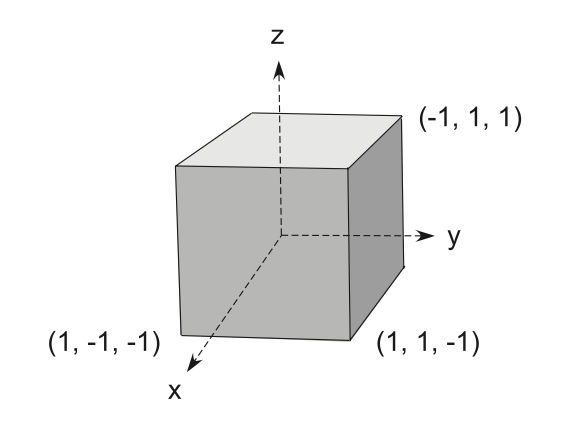

The cube has an inertia tensor for axes at the center:

$ \begin{equation} 
{\bf I} = 
\begin{pmatrix} 
2/3 & -1/4 & -1/4 \\
-1/4 & 2/3 & -1/4 \\
-1/4 & -1/4 & 2/3 
\end{pmatrix}. \end{equation} $

The cube is rotated with the three angular velocities:

$ \begin{equation} 
{\bf \omega} = 
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \ {\bf \omega} = 
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \ {\bf \omega} = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}
\end{equation} $

1. Compute the angular momentum vector $\bf L$ via the matrix multiplication ${\bf L} = {\bf I\omega}$ for each case. (5 pts.)

2. Make three 3-D plots for ${\bf \omega}$ and ${\bf L}$ for each case. Label and describe your plots clearly. (10 pts.)

In [55]:
# Define the given matrix as an array I
I = array([[2/3, -1/4, -1/4],[-1/4, 2/3, -1/4],[-1/4, -1/4, 2/3]])
print("I:\n", I)

# Define the angular velocities as an array w
w = array([[1, 0, 0],[0, 1, 0],[1, 1, 1]])    
print('\nAngular velocities:\n', w)

# Loop over each column of the three angular velocities
L = zeros((3,3))                                  # initialize a 3x3 matrix
for i in range(len(w)):                  
  L[i] = matmul(I,w[i])                           # assign each element of L to matrix product of I with each respective element of w
print("\nAngular momentum vector:\n", L)

I:
 [[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]

Angular velocities:
 [[1 0 0]
 [0 1 0]
 [1 1 1]]

Angular momentum vector:
 [[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [ 0.16666667  0.16666667  0.16666667]]


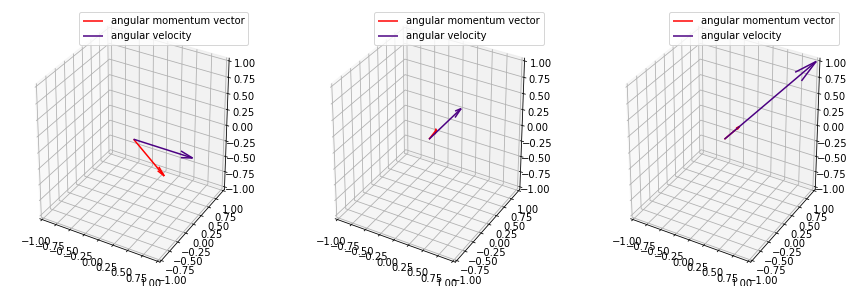

In [57]:
# 3D plotting
fig = plt.figure(figsize=(15,5))           # set figure size
k = 131                                    # set k (nrows = 1, ncols = 3, index = 1)

for i in range(len(w)):                                    # loop through each element in L and w
  ax = fig.add_subplot(k+i, projection='3d')               # add axes to the figure and update index
  ax.quiver(0, 0, 0, L[i][0], L[i][1], L[i][2], length=1, arrow_length_ratio=0.2, color='red', label='angular momentum vector')       # plot arrows for angular momentum vectors (initial value of axis to final value of specified axis)    
  ax.quiver(0, 0, 0, w[i][0], w[i][1], w[i][2], length=1, arrow_length_ratio=0.2, color='indigo', label='angular velocity')           # plot arrows for angular velocities (initial value of axis to final value of specified axis)
  ax.set_xlim((-1,1))         # set limits
  ax.set_ylim((-1,1))         # set limits
  ax.set_zlim((-1,1))         # set limits
  plt.legend()                # include legend

# Show plot
plt.show()

### PROBLEM 4 (25 pts.; 50/50 for code & discussion)

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)* 

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(5 pts.)*

In [36]:
# Assign variables
eps = 1e-6                   # desired accuracy
x = 1                        # initial value of x
error = 1                    # initialize error for the loop
c = 2                        # known parameter

# Define given equation as a function of x and c
def f(x, c):                 
  return 1 - exp(-c*x)

# Start of loop
iteration = 0                                        # initialize no. of iteration
while error > eps:                                   # loops while error is greater than desired accuracy
  prev_x = x                                         # assign the most recent estimate to the previous one
  x = f(x, c)                                        # update new value of x
  error = abs((prev_x - x)/(1 - 1/2*exp(-2*x)))      # update error with the Newman formula  
  iteration += 1                                     # update no. of iteration
print ("At c = 2, the loop terminated at iteration =", iteration, "with x =", x)

At c = 2, the loop terminated at iteration = 14 with x = 0.7968126311118457


Solutions of x(c) where c = [0, 3]
                 x     c
0    0.000000e+00  0.00
1    9.949663e-11  0.01
2    3.167572e-09  0.02
3    7.178454e-10  0.03
4    4.011883e-09  0.04
..            ...   ...
296  9.376847e-01  2.96
297  9.383966e-01  2.97
298  9.390998e-01  2.98
299  9.397941e-01  2.99
300  9.404798e-01  3.00

[301 rows x 2 columns] 



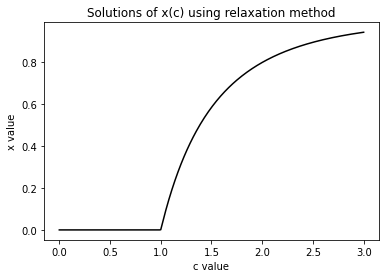

In [37]:
# Create arrays
c_pts = arange(0, 3.01, 0.01)            # returns evenly spaced values with specified step excluding last point
x_pts = empty_like(c_pts)                # returns new array with same shape and type 

count = 0                                # initialize indexing
eps = 1e-6                               # desired accuracy

# Loop through each element in c_pts
for i in c_pts:
  x = 1                                  # initial value of x
  error = 1                              # initial value of error

# Apply similar algorithm
  while error > eps:                                 # loops while error is greater than desired accuracy
    prev_x = x                                       # assign the most recent estimate to the previous one
    x = f(x, i)                                      # update new value of x with respect to the element in c_pts
    error = abs((prev_x - x)/(1 - 1/2*exp(-2*x)))    # update error with the Newman formula
  
  x_pts[count] = x                                   # assign numerical value of computed x with corresponding index to the initialized array
  count += 1                                         # update index

# Present obtained solutions of x in a dataframe
data = {'x': x_pts, 'c': c_pts}                           # set column labels
df = pd.DataFrame(data)                                   # make dataframe
print("Solutions of x(c) where c = [0, 3]\n", df, "\n")

# Plot
fig, ax = plt.subplots()
ax.plot(c_pts, x_pts, 'k-')
ax.set(xlabel='c value', ylabel='x value', title='Solutions of x(c) using relaxation method')
plt.show()

**As we can see from the plot above, and from further extension of c values, the values of x converge to ~1.0 as c increases. The values of x start to 'explode' at about c = 1.0, continuously increasing until about c = 3.0 at which it starts to stabilize.**

### PROBLEM 5 (30 pts.; 50/50 for code & discussion)

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use either one of (i) Newton's method or (ii) the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures. (30 pts.) 

In [17]:
# Define variables with corresponding values from the Newman text
G = 6.674e-11           # (m^3 kg^-1 s^-2) gravitational constant
M = 5.974e24            # (kg) mass of Earth
m = 7.348e22            # (kg) mass of moon
R = 3.844e8             # (m) distance from Earth to moon
w = 2.662e-6            # (s^-1) angular velocity
eps = 1e-10             # desired accuracy

# Define the given equation as a function of r
def f(r):
  return (G*M/r**2) - (G*m / (R-r)**2) - (w**2*r)

# Solve for its first derivative then define it as a function
def f_prime(r):
  return (-2*G*M / r**3) - (2*G*m / (R-r)**3) - (w**2)

# Define Newton's method
def newton (x0 , f , f_prime):             # where x0 is the guess distance r
  error = 1                                # Initial value for error
  x = x0 - f(x0)/f_prime(x0)               # get the first iteration of x from the guessed distance

  while error > eps:                       # loops while error is greater than desired accuracy
    x0 = x                                 # store last iteration of x as the old x   
    x = x0 - f(x0)/f_prime(x0)             # solve for the new iteration of x using the previous x value
    error = abs(x - x0)                    # error formula: absolute value of the difference between new iteration of x and previous x
    
  return x                                 # returns new value of x

# Choose random distance between the earth and moon
x0 = 500000000

print("The distance from earth to the Lagrange (L1) point is:", newton(x0 , f , f_prime), "m")        # call newton function with assigned value of x0

The distance from earth to the Lagrange (L1) point is: 326045071.66535544 m
